In [53]:
import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Getting Data

In [42]:
dataset = openml.datasets.get_dataset(43611)
X, y, _, attribute_names = dataset.get_data(target='class')
data = pd.concat([X, y], axis=1)

data

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


## Data Preparation

In [40]:
data.dropna(inplace=True)

## Data Split


In [48]:
from sklearn.model_selection import train_test_split

y = data['class']
X = data.drop('class', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y ,random_state=42)

x_train

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis
569,1343374,10,10,8,10,6,5.0,10,3,1
443,734111,1,1,1,1,2,2.0,1,1,1
135,1181356,5,1,1,1,2,2.0,3,3,1
396,1176187,3,1,1,1,2,1.0,3,1,1
546,1222464,6,10,10,10,4,10.0,7,10,1
...,...,...,...,...,...,...,...,...,...,...
174,1200892,8,6,5,4,3,10.0,6,1,1
239,1243256,10,4,3,2,3,10.0,5,3,2
428,1272039,1,1,1,1,2,1.0,2,1,1
657,1333877,5,4,5,1,8,1.0,3,6,1


## Visualisation

### Scatter Matrix

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='thickness', ylabel='id'>,
        <Axes: xlabel='size', ylabel='id'>,
        <Axes: xlabel='shape', ylabel='id'>,
        <Axes: xlabel='adhesion', ylabel='id'>,
        <Axes: xlabel='single', ylabel='id'>,
        <Axes: xlabel='nuclei', ylabel='id'>,
        <Axes: xlabel='chromatin', ylabel='id'>,
        <Axes: xlabel='nucleoli', ylabel='id'>,
        <Axes: xlabel='mitosis', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='thickness'>,
        <Axes: xlabel='thickness', ylabel='thickness'>,
        <Axes: xlabel='size', ylabel='thickness'>,
        <Axes: xlabel='shape', ylabel='thickness'>,
        <Axes: xlabel='adhesion', ylabel='thickness'>,
        <Axes: xlabel='single', ylabel='thickness'>,
        <Axes: xlabel='nuclei', ylabel='thickness'>,
        <Axes: xlabel='chromatin', ylabel='thickness'>,
        <Axes: xlabel='nucleoli', ylabel='thickness'>,
        <Axes: xlabel='mitosis', ylabel='thickness'>],


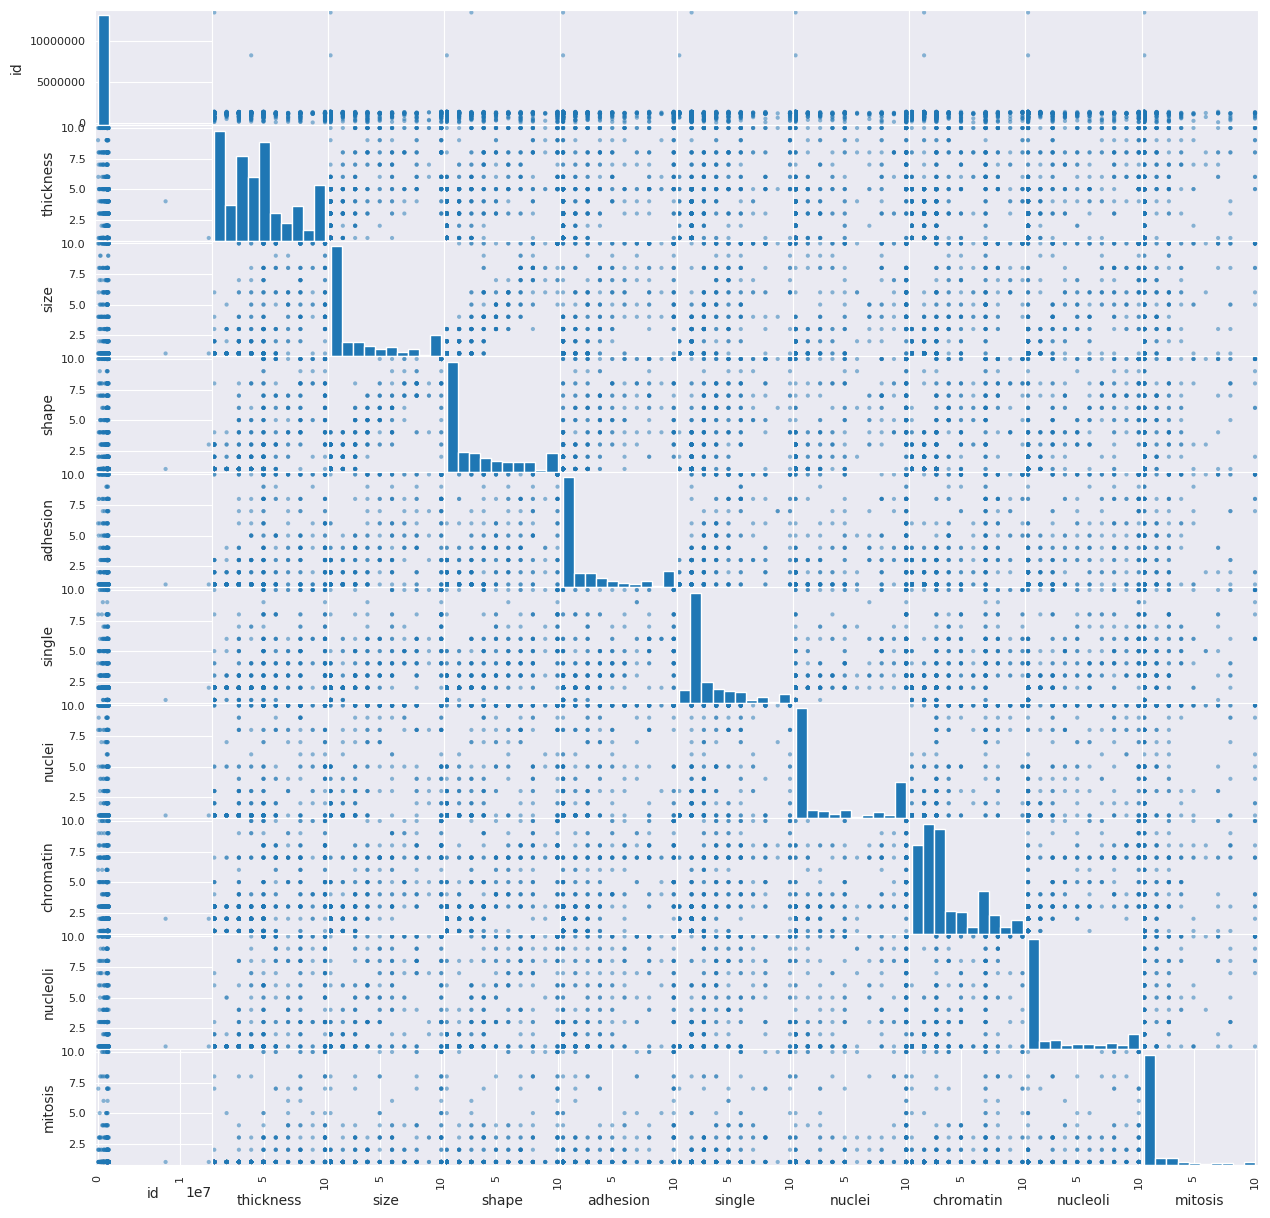

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(x_train, figsize=(15,15))

### Correlation Matrix

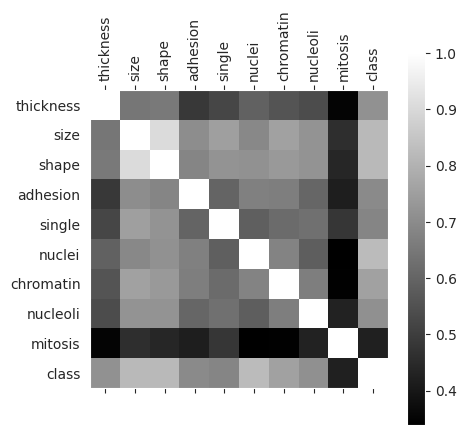

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
single,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
mitosis,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [55]:
names = data.columns[1:]
corr_mtx = (data[names]).corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

corr_mtx

# Metric Function

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       193

    accuracy                           1.00       559
   macro avg       1.00      1.00      1.00       559
weighted avg       1.00      1.00      1.00       559



{'accuracy': 1.0, 'roc_score': 1.0}

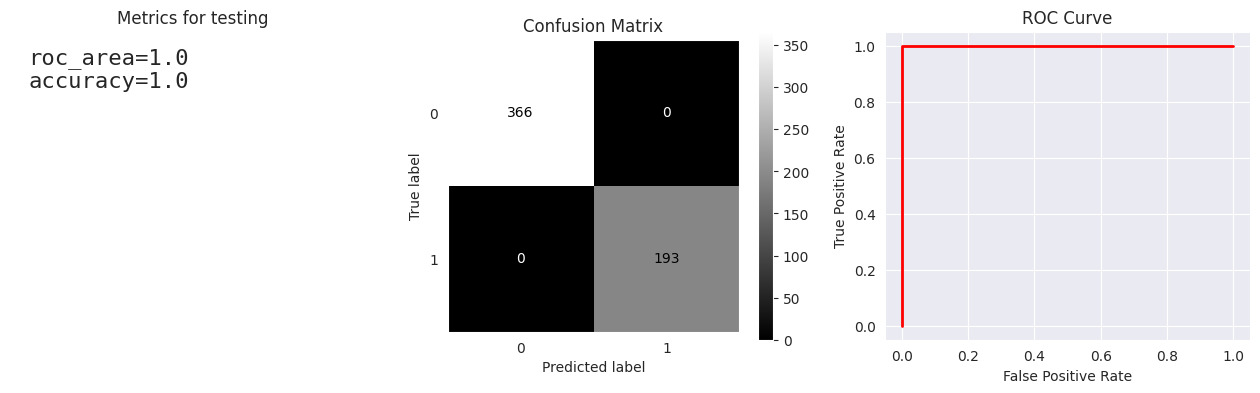

In [57]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, preds)
    roc_area = roc_auc_score(lables, preds)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


metrics(y_train,y_train, "testing")